In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stock-prices-of-mastercard-and-visa-2008-2024/MVR.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
plt.style.use("seaborn")

/tmp/ipykernel_18/3279479596.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [3]:
df=pd.read_csv("/kaggle/input/stock-prices-of-mastercard-and-visa-2008-2024/MVR.csv")
df.tail()

,Date,Open_M,High_M,Low_M,Close_M,Adj Close_M,Volume_M,Open_V,High_V,Low_V,Close_V,Adj Close_V,Volume_V
4042,2024-06-24,454.929993,463.070007,454.929993,456.959991,456.959991,2597100,275.320007,280.390015,275.269989,276.299988,276.299988,24149600
4043,2024-06-25,458.480011,460.309998,453.799988,455.649994,455.649994,2529600,276.850006,277.929993,273.529999,273.529999,273.529999,19897700
4044,2024-06-26,452.750000,454.679993,451.390015,452.380005,452.380005,2451400,272.910004,274.459991,271.750000,273.600006,273.600006,12172000
4045,2024-06-27,448.570007,448.700012,442.000000,442.750000,442.750000,3313800,268.510010,270.589996,266.500000,266.589996,266.589996,10529100
4046,2024-06-28,444.640015,448.299988,438.720001,441.160004,441.160004,4105000,267.200012,268.600006,261.250000,262.470001,262.470001,13955100


For now we will only be using the mastercard data 

In [4]:
df=df.iloc[:,:6]
df.info()
#converting the date column to datetime
df["Date"]=pd.to_datetime(df["Date"])
df["Day"]=df["Date"].dt.day
df["Month"]=df["Date"].dt.month
df["Year"]=df["Date"].dt.year
df.set_index("Date",drop=True,inplace =True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4047 entries, 0 to 4046
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4047 non-null   object 
 1   Open_M       4047 non-null   float64
 2   High_M       4047 non-null   float64
 3   Low_M        4047 non-null   float64
 4   Close_M      4047 non-null   float64
 5   Adj Close_M  4047 non-null   float64
dtypes: float64(5), object(1)
memory usage: 189.8+ KB


In [5]:
df

,Open_M,High_M,Low_M,Close_M,Adj Close_M,Day,Month,Year
Date,,,,,,,,
2008-06-02,30.926001,32.000000,30.257000,32.000000,29.529486,2,6,2008
2008-06-03,31.386999,31.399000,30.235001,30.740000,28.366755,3,6,2008
2008-06-04,30.745001,30.959999,29.454000,29.740000,27.443956,4,6,2008
2008-06-05,29.951000,30.615999,29.544001,30.615999,28.252338,5,6,2008
2008-06-06,30.228001,30.242001,29.481001,29.573000,27.289856,6,6,2008
...,...,...,...,...,...,...,...,...
2024-06-24,454.929993,463.070007,454.929993,456.959991,456.959991,24,6,2024
2024-06-25,458.480011,460.309998,453.799988,455.649994,455.649994,25,6,2024
2024-06-26,452.750000,454.679993,451.390015,452.380005,452.380005,26,6,2024


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4047 entries, 2008-06-02 to 2024-06-28
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open_M       4047 non-null   float64
 1   High_M       4047 non-null   float64
 2   Low_M        4047 non-null   float64
 3   Close_M      4047 non-null   float64
 4   Adj Close_M  4047 non-null   float64
 5   Day          4047 non-null   int32  
 6   Month        4047 non-null   int32  
 7   Year         4047 non-null   int32  
dtypes: float64(5), int32(3)
memory usage: 237.1 KB


In [7]:
df.head()

,Open_M,High_M,Low_M,Close_M,Adj Close_M,Day,Month,Year
Date,,,,,,,,
2008-06-02,30.926001,32.000000,30.257000,32.000000,29.529486,2,6,2008
2008-06-03,31.386999,31.399000,30.235001,30.740000,28.366755,3,6,2008
2008-06-04,30.745001,30.959999,29.454000,29.740000,27.443956,4,6,2008
2008-06-05,29.951000,30.615999,29.544001,30.615999,28.252338,5,6,2008
2008-06-06,30.228001,30.242001,29.481001,29.573000,27.289856,6,6,2008


# Plotting the moving average for 100 and 200 days for closing price 

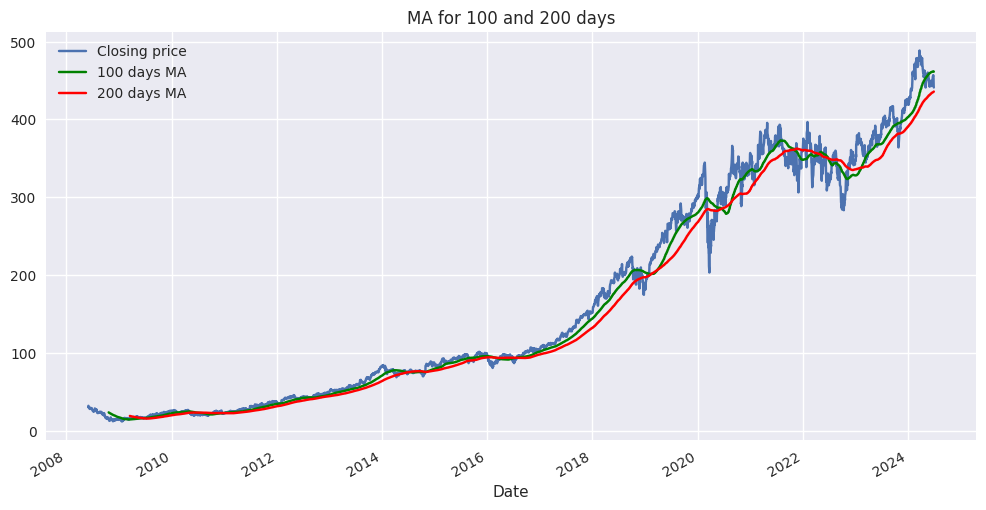

In [8]:
df["Close_M"].plot(figsize=(12,6))
MA_100=df["Close_M"].rolling(100).mean()
MA_200=df["Close_M"].rolling(200).mean()

MA_100.plot(c="green")
MA_200.plot(c="red")
plt.title("MA for 100 and 200 days")
plt.legend(["Closing price","100 days MA","200 days MA"],loc="best")
plt.show()

In [9]:
df.head()

,Open_M,High_M,Low_M,Close_M,Adj Close_M,Day,Month,Year
Date,,,,,,,,
2008-06-02,30.926001,32.000000,30.257000,32.000000,29.529486,2,6,2008
2008-06-03,31.386999,31.399000,30.235001,30.740000,28.366755,3,6,2008
2008-06-04,30.745001,30.959999,29.454000,29.740000,27.443956,4,6,2008
2008-06-05,29.951000,30.615999,29.544001,30.615999,28.252338,5,6,2008
2008-06-06,30.228001,30.242001,29.481001,29.573000,27.289856,6,6,2008


In [10]:
df.iloc[:,3]

Date
2008-06-02     32.000000
2008-06-03     30.740000
2008-06-04     29.740000
2008-06-05     30.615999
2008-06-06     29.573000
                 ...    
2024-06-24    456.959991
2024-06-25    455.649994
2024-06-26    452.380005
2024-06-27    442.750000
2024-06-28    441.160004
Name: Close_M, Length: 4047, dtype: float64

In [11]:
X3,y=[],[]
#we will be using the past 100 days data to predict the next day closing price
#for this we need ony the day, month , year and the closing price 
for i in range(0,len(df)-100):
#     X0.append(df.iloc[i:i+100,5]) #day
#     X1.append(df.iloc[i:i+100,6]) #month
#     X2.append(df.iloc[i:i+100,7]) #year
    X3.append(df.iloc[i:i+100,3]) #past 100 days closing price
    y.append(df.iloc[i+100,3]) #101th day prices

In [12]:
len(X3),len(y)

(3947, 3947)

In [13]:
#normalsing the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
#converting list to arrays
X3,y=np.array(X3),np.array(y)
X3.shape,y.shape

((3947, 100), (3947,))

In [14]:
y=np.reshape(y,(len(y),1))
y.shape

(3947, 1)

In [15]:
# X0=scaler.fit_transform(X0)
# X1=scaler.fit_transform(X1)
# X2=scaler.fit_transform(X2)
X3=scaler.fit_transform(X3)
y=scaler.fit_transform(y)
#converting input data to three dimension as it is expected by our LSTM model
X=np.stack([X3],axis=2)
X.shape

(3947, 100, 1)

In [16]:
print(scaler.inverse_transform(X3))

[[ 33.23980086  31.90201234  30.79864605 ...  15.675       15.014
   14.978     ]
 [ 31.90201234  30.84027541  31.72668033 ...  15.014       14.978
   14.093     ]
 [ 30.84027541  31.7703559   30.62172607 ...  14.978       14.093
   13.6       ]
 ...
 [488.640015   488.27899684 483.18410579 ... 454.850006   456.959991
  455.649994  ]
 [488.27899684 484.22318622 487.14625524 ... 456.959991   455.649994
  452.380005  ]
 [484.22318622 488.19407169 488.640015   ... 455.649994   452.380005
  442.75      ]]


In [17]:
#splitting into training and testing
X_train,y_train=X[:2000],y[:2000]
X_test,y_test=X[2000:],y[2000:]
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((2000, 100, 1), (2000, 1), (1947, 100, 1), (1947, 1))

Building the model

In [18]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential,layers
from keras.layers import LSTM,Dense,Dropout


2024-07-04 15:33:56.166589: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-04 15:33:56.166728: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-04 15:33:56.371082: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [19]:
model=Sequential()
model.add(LSTM(units=128,return_sequences=False,activation="relu",input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.4))
# model.add(LSTM(units=60,activation="relu",return_sequences=True))
# model.add(Dropout(0.4))
# model.add(LSTM(units=80,activation="relu",return_sequences=True))
# model.add(Dropout(0.3))
# model.add(LSTM(units=120,activation="relu",return_sequences=False))
# model.add(Dropout(0.5))
model.add(Dense(units=1))



/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.compile(optimizer="adam",loss='mean_squared_error',metrics=['mae'])

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,689 (260.50 KB)

 Trainable params: 66,689 (260.50 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - loss: 0.0029 - mae: 0.0368
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 2.0859e-04 - mae: 0.0107
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - loss: 1.6771e-04 - mae: 0.0092
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 1.6223e-04 - mae: 0.0090
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - loss: 1.4367e-04 - mae: 0.0085
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - loss: 1.3695e-04 - mae: 0.0083
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - loss: 1.3230e-04 - mae: 0.0084
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - loss: 1.2159e-04 - mae: 0.0080
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 1.2606e-04 - mae: 0.0081
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - loss: 1.2093e-04 - mae: 0.0078


In [23]:
print(model.evaluate(X_test,y_test))


61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 9.4530e-04 - mae: 0.0250
[0.003003230784088373, 0.03823390230536461]


In [24]:
pred=model.predict(X_train)
pred=scaler.inverse_transform(pred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step


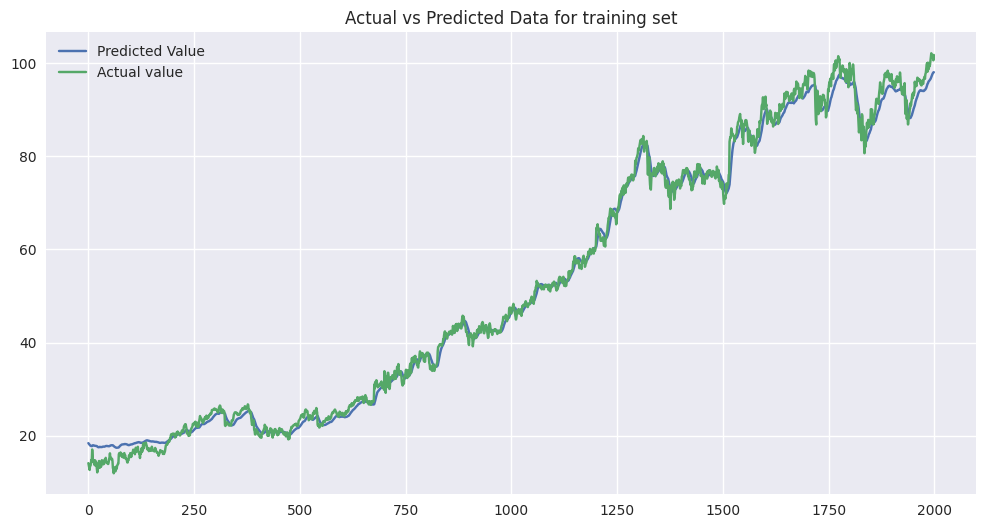

In [25]:
plt.figure(figsize=(12,6))
plt.plot(pred)
plt.plot(scaler.inverse_transform(y_train))
plt.title("Actual vs Predicted Data for training set")
plt.legend(["Predicted Value","Actual value"],loc="best")

In [26]:
predictions=model.predict(X_test)
predictions=scaler.inverse_transform(predictions)

61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step


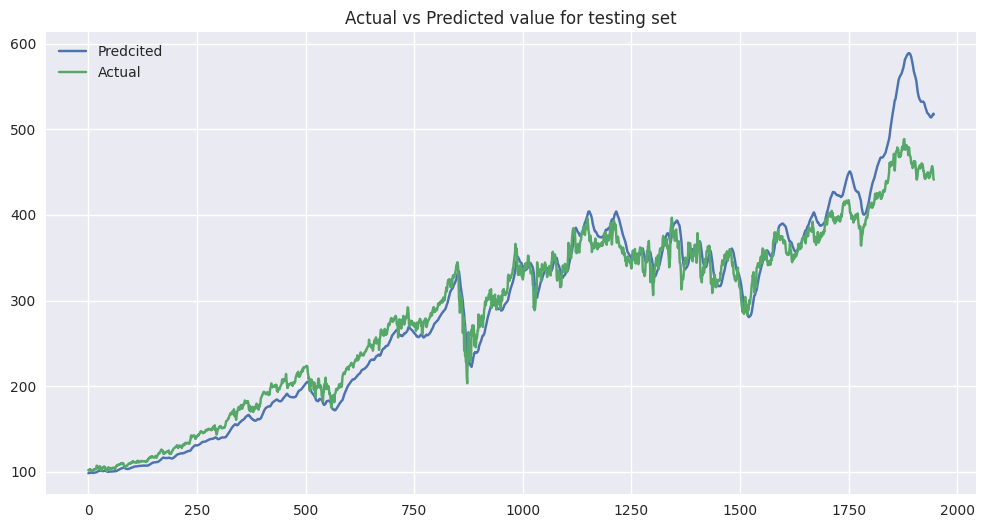

In [27]:
plt.figure(figsize=(12,6))
plt.plot(predictions)
plt.plot(scaler.inverse_transform(y_test))
plt.title("Actual vs Predicted value for testing set")
plt.legend(["Predcited","Actual"],loc="best")

In [28]:
#plotting the complete data
inv_ytest=scaler.inverse_transform(y_test)
plotting_data=pd.DataFrame({
    "Actual y_test":inv_ytest.reshape(-1),
    "Predicted y_test":predictions.reshape(-1)
},
    index=df.index[2100:]
)
whole_data=pd.concat([df["Close_M"][:2100],plotting_data],axis=0)
whole_data.fillna(0)

,Close_M,Actual y_test,Predicted y_test
Date,,,
2008-06-02,32.000000,0.000000,0.000000
2008-06-03,30.740000,0.000000,0.000000
2008-06-04,29.740000,0.000000,0.000000
2008-06-05,30.615999,0.000000,0.000000
2008-06-06,29.573000,0.000000,0.000000
...,...,...,...
2024-06-24,0.000000,456.959991,515.327393
2024-06-25,0.000000,455.649994,516.558655
2024-06-26,0.000000,452.380005,517.619019


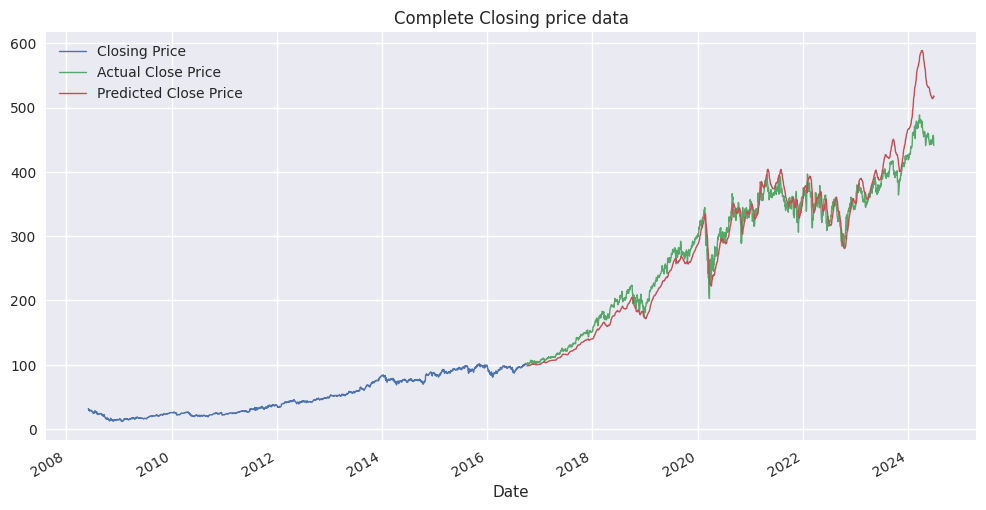

In [29]:
whole_data.plot(lw=1,figsize=(12,6))
plt.title("Complete Closing price data")
plt.legend(["Closing Price","Actual Close Price","Predicted Close Price"],loc="best")
plt.show()